<a href="https://colab.research.google.com/github/nanoNNsk/superaiss5_hackathon/blob/main/img_captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install unsloth
# Also get the latest nightly Unsloth!
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git

In [ ]:
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Llama-3.2-11B-Vision-Instruct-bnb-4bit", # Llama 3.2 vision support
    "unsloth/Llama-3.2-11B-Vision-bnb-4bit",
    "unsloth/Llama-3.2-90B-Vision-Instruct-bnb-4bit", # Can fit in a 80GB card!
    "unsloth/Llama-3.2-90B-Vision-bnb-4bit",

    "unsloth/Pixtral-12B-2409-bnb-4bit",              # Pixtral fits in 16GB!
    "unsloth/Pixtral-12B-Base-2409-bnb-4bit",         # Pixtral base model

    "unsloth/Qwen2-VL-2B-Instruct-bnb-4bit",          # Qwen2 VL support
    "unsloth/Qwen2-VL-7B-Instruct-bnb-4bit",
    "unsloth/Qwen2-VL-72B-Instruct-bnb-4bit",

    "unsloth/llava-v1.6-mistral-7b-hf-bnb-4bit",      # Any Llava variant works!
    "unsloth/llava-1.5-7b-hf-bnb-4bit",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastVisionModel.from_pretrained(
    # "scb10x/typhoon2-qwen2vl-7b-vision-instruct",
    "unsloth/Qwen2-VL-7B-Instruct-bnb-4bit",
    load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.1.8: Fast Qwen2_Vl vision patching. Transformers: 4.47.1.
   \\   /|    GPU: Tesla T4. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/6.36G [00:00<?, ?B/s]

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


generation_config.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [ ]:
model

Qwen2VLForConditionalGeneration(
  (visual): Qwen2VisionTransformerPretrainedModel(
    (patch_embed): PatchEmbed(
      (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
    )
    (rotary_pos_emb): VisionRotaryEmbedding()
    (blocks): ModuleList(
      (0-12): 13 x Qwen2VLVisionBlock(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): VisionSdpaAttention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (mlp): VisionMlp(
          (fc1): Linear(in_features=1280, out_features=5120, bias=True)
          (act): QuickGELUActivation()
          (fc2): Linear(in_features=5120, out_features=1280, bias=True)
        )
      )
      (13-30): 18 x Qwen2VLVisionBlock(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
      

In [ ]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True, # False if not finetuning vision layers
    finetune_language_layers   = True, # False if not finetuning language layers
    finetune_attention_modules = True, # False if not finetuning attention layers
    finetune_mlp_modules       = True, # False if not finetuning MLP layers

    r = 16,           # The larger, the higher the accuracy, but might overfit
    lora_alpha = 16,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
    # target_modules = "all-linear", # Optional now! Can specify a list if needed
)

Unsloth: Making `model.base_model.model.visual` require gradients


In [ ]:
model

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): Qwen2VLForConditionalGeneration(
      (visual): Qwen2VisionTransformerPretrainedModel(
        (patch_embed): PatchEmbed(
          (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
        (rotary_pos_emb): VisionRotaryEmbedding()
        (blocks): ModuleList(
          (0-12): 13 x Qwen2VLVisionBlock(
            (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
            (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
            (attn): VisionSdpaAttention(
              (qkv): lora.Linear(
                (base_layer): Linear(in_features=1280, out_features=3840, bias=True)
                (lora_dropout): ModuleDict(
                  (default): Identity()
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=1280, out_features=16, bias=False)
                )
                (lora_B): ModuleDict(


# prepare data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/img_caption/image-processing-thai-language-image-captioning.zip'

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
  inflating: train/train/travel/15347.jpg  
  inflating: train/train/travel/15348.jpg  
  inflating: train/train/travel/15349.jpg  
  inflating: train/train/travel/15350.jpg  
  inflating: train/train/travel/15351.jpg  
  inflating: train/train/travel/15352.jpg  
  inflating: train/train/travel/15353.jpg  
  inflating: train/train/travel/15354.jpg  
  inflating: train/train/travel/15355.jpg  
  inflating: train/train/travel/15356.jpg  
  inflating: train/train/travel/15357.jpg  
  inflating: train/train/travel/15358.jpg  
  inflating: train/train/travel/15359.jpg  
  inflating: train/train/travel/15360.jpg  
  inflating: train/train/travel/15361.jpg  
  inflating: train/train/travel/15362.jpg  
  inflating: train/train/travel/15363.jpg  
  inflating: train/train/travel/15364.jpg  
  inflating: train/train/travel/15365.jpg  
  inflating: train/train/travel/15366.jpg  
  inflating: train/train/travel/15367.jpg  
  inflating: train/

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d awsaf49/coco-2017-dataset

Dataset URL: https://www.kaggle.com/datasets/awsaf49/coco-2017-dataset
License(s): CC-BY-SA-4.0
100% 25.0G/25.0G [18:42<00:00, 24.4MB/s]
100% 25.0G/25.0G [18:42<00:00, 23.9MB/s]


In [ ]:
!unzip coco-2017-dataset.zip -d ./coco2017

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
  inflating: ./coco2017/coco2017/val2017/000000000139.jpg  
  inflating: ./coco2017/coco2017/val2017/000000000285.jpg  
  inflating: ./coco2017/coco2017/val2017/000000000632.jpg  
  inflating: ./coco2017/coco2017/val2017/000000000724.jpg  
  inflating: ./coco2017/coco2017/val2017/000000000776.jpg  
  inflating: ./coco2017/coco2017/val2017/000000000785.jpg  
  inflating: ./coco2017/coco2017/val2017/000000000802.jpg  
  inflating: ./coco2017/coco2017/val2017/000000000872.jpg  
  inflating: ./coco2017/coco2017/val2017/000000000885.jpg  
  inflating: ./coco2017/coco2017/val2017/000000001000.jpg  
  inflating: ./coco2017/coco2017/val2017/000000001268.jpg  
  inflating: ./coco2017/coco2017/val2017/000000001296.jpg  
  inflating: ./coco2017/coco2017/val2017/000000001353.jpg  
  inflating: ./coco2017/coco2017/val2017/000000001425.jpg  
  inflating: ./coco2017/coco2017/val2017/000000001490.jpg  
  inflating: ./coco2017/coco2017/val2017/00

In [ ]:
import json


with open('/content/capgen_v1.0_train.json', 'r', encoding='utf-8') as file:
    data = json.load(file)


updated_data = {}
for key, value in data.items():
    new_key = key.replace("coco/train2017/", "/content/coco2017/coco2017/train2017/")
    new_key = new_key.replace("ipu24/", "/content/train/")
    updated_data[new_key] = value


with open('new_train.json', 'w', encoding='utf-8') as file:
    json.dump(updated_data, file, ensure_ascii=False, indent=2)

In [ ]:
with open('/content/capgen_v1.0_val.json', 'r', encoding='utf-8') as file:
    data = json.load(file)


updated_data = {}
for key, value in data.items():
    new_key = key.replace("coco/val2017/", "/content/coco2017/coco2017/val2017/")
    new_key = new_key.replace("ipu24/", "/content/val/")
    updated_data[new_key] = value


with open('new_val.json', 'w', encoding='utf-8') as file:
    json.dump(updated_data, file, ensure_ascii=False, indent=2)

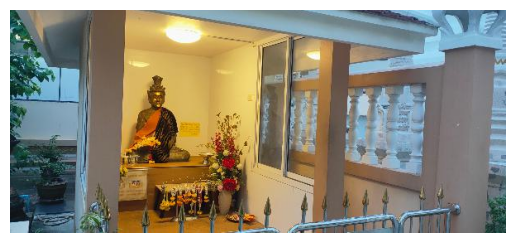

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/val/val/travel/00000.jpg'
image = Image.open(image_path)


plt.imshow(image)
plt.axis('off')
plt.show()

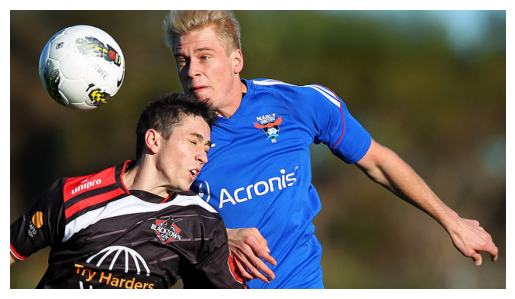

In [ ]:
image_path = '/content/coco2017/coco2017/val2017/000000060102.jpg'
image = Image.open(image_path)

# แสดงรูปภาพ
plt.imshow(image)
plt.axis('off')  # ซ่อนแกน
plt.show()

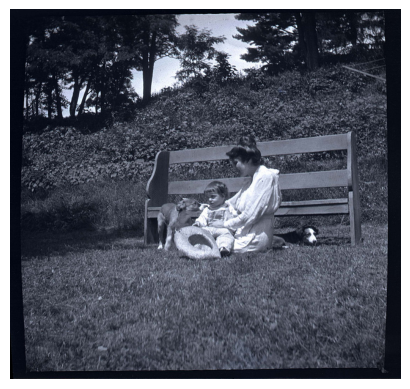

In [ ]:
image_path = '/content/coco2017/coco2017/train2017/000000373716.jpg'
image = Image.open(image_path)

# แสดงรูปภาพ
plt.imshow(image)
plt.axis('off')  # ซ่อนแกน
plt.show()

In [ ]:
with open('/content/new_train.json', 'r', encoding='utf-8') as file:
    data_train = json.load(file)
data_train

{'/content/coco2017/coco2017/train2017/000000373716.jpg': ['ผู้หญิงสวมเสื้อแขนยาวสีขาวและเด็กนั่งเล่นกับสุนัขอยู่ ในสวนหย่อม',
  'สาวคนนึงกำลังพาเด็กมานั่งเล่นอยู่ภายในสนามหญ้าพร้อมกับสุนัข',
  'ภาพขาวดำ ผู้หญิงนั่งบนพื้นอุ้มเด็กบนตัก ข้าง ๆ มีหมาสองตัว ด้านหลังมีม้านั่งไม้'],
 '/content/coco2017/coco2017/train2017/000000196888.jpg': ['สีน้ำตาลตัวเล็กกำลังกินอาหารอยู่บนจานกระดาษสีขาวข้างแก้วน้ำ',
  'นกน้อยตัวหนึ่งกำลังจิกกินเศษอาหารที่วางทิ้งไว้บนโต๊ะ',
  'บนโต๊ะอาหาร นกน้อยตัวหนึ่งกำลังก้มหน้ากินอะไรบางอย่าง'],
 '/content/coco2017/coco2017/train2017/000000282238.jpg': ['ไปสัญญาณจราจร 3 อันติดอยู่บนเสาไฟสีดำแสดงสัญญาณไฟสีแดง',
  'สัญญาณไฟจราจรที่ถูกติดตั้งอยู่กับเสาไฟอยู่ริมถนน',
  'สัญญาณไฟจราจรที่ได้ติดอยู่บนเสาต้นหนึ่งที่ได้ตั้งอยู่ในริมถนน'],
 '/content/coco2017/coco2017/train2017/000000267035.jpg': ['จานสีขาวจานนึงขบวนการนั้นมี โดนัทสอดไส้ทูน่าอยู่ในจาน',
  'เบอร์เกอร์มีไส้เนื้อสัตว์และซอสสีขาวหั่นครึ่งชิ้นใส่อยู่ในจานทรงกลมสีขาวบนโต๊ะ',
  'ขนมปังที่เป็นโดนัตวางอยู่บนจานสีขาวที่อย

In [ ]:
print(type(data_train))

<class 'dict'>


In [ ]:
with open('/content/new_val.json', 'r', encoding='utf-8') as file:
    data_val = json.load(file)
data_val

{'/content/coco2017/coco2017/val2017/000000060102.jpg': ['นักกีฬาฟุตบอลใส่เสื้อสีดำกำลังแย่งฟุตบอลอยู่กับผู้ชายใส่เสื้อสีน้ำเงิน',
  'ผู้ชายใส่เสื้อสีฟ้าและผู้ชายใส่เสื้อสีดำ เล่นฟุตบอลอยู่ในสนามและมีลูกฟุตบอลสีขาว',
  'ผู้ชายใส่เสื้อสีน้ำเงินยืนอยู่ 1คน ด้านหน้ามีผู้ชายยืนอยู่ 1คน มีลูกฟุตบอลลอยอยู่ด้านหน้า'],
 '/content/val/val/travel/00000.jpg': ['รูปปั้นฤาษีสีทองนั่งอยู่ในท่าขัดสมาธิอยู่ภายในศาลาขนาดเล็ก',
  'รูปปั้นฤาษีที่ตั้งอยู่บนโต๊ะบูชาอยู่ภายในศาลาวัดสีขาว',
  'รูปปั้นคล้ายฤษีสีทอง พาดผ้าสีจีวรและผ้าลายเสือ ด้านหน้ามีพวงมาลัยและแจกันดอกไม้'],
 '/content/coco2017/coco2017/val2017/000000458702.jpg': ['มิเตอร์เก็บค่าจอดรถสีดำตั้งอยู่บนเสาสีเทามีต้นไม้ต้นเล็กด้านข้าง',
  'มิเตอร์ที่จอดรถที่ติดตั้งอยู่ตรงบริเวณริมถนนที่มีต้นไม้ต้นใหญ่อยู่ใกล้ๆ',
  'มิเตอร์จอดรถแบบสองหัวบนเสาต้นเดียวกัน ข้างถนน ข้างๆ มีหญ้าขึ้น'],
 '/content/val/val/travel/00001.jpg': ['เรือดำสีแดงรออยู่ในแม่น้ำมีคนกำลังตกปลาอยู่ด้านข้าง',
  'กลุ่มคนที่ตกปลาอยู่บนโขดหินที่ริมตลิ่ง มีเรือสีแดงแล่นอยู่ในทะเล',
  'ผู้

In [ ]:
reduced_train = {key: value[0] for key, value in data_train.items()}
reduced_val = {key: value[0] for key, value in data_val.items()}

In [ ]:
reduced_train

{'/content/coco2017/coco2017/train2017/000000373716.jpg': 'ผู้หญิงสวมเสื้อแขนยาวสีขาวและเด็กนั่งเล่นกับสุนัขอยู่ ในสวนหย่อม',
 '/content/coco2017/coco2017/train2017/000000196888.jpg': 'สีน้ำตาลตัวเล็กกำลังกินอาหารอยู่บนจานกระดาษสีขาวข้างแก้วน้ำ',
 '/content/coco2017/coco2017/train2017/000000282238.jpg': 'ไปสัญญาณจราจร 3 อันติดอยู่บนเสาไฟสีดำแสดงสัญญาณไฟสีแดง',
 '/content/coco2017/coco2017/train2017/000000267035.jpg': 'จานสีขาวจานนึงขบวนการนั้นมี โดนัทสอดไส้ทูน่าอยู่ในจาน',
 '/content/coco2017/coco2017/train2017/000000214481.jpg': 'ห้องครัวห้องนึงที่มีตู้เก็บของเป็นสีน้ำตาลวางอยู่หลายตู้และมีอ่างล้างหน้าสีขาว',
 '/content/coco2017/coco2017/train2017/000000332039.jpg': 'ช็อคโกแลตวงกลมราดซอสสีขาวตั้งอยู่ข้างกันด้านบนมีช็อกโกแลตอีกอัน',
 '/content/coco2017/coco2017/train2017/000000527510.jpg': 'เครื่องบินโดยสารมีตัวอักษรสีเทาตัวใหญ่ด้านข้าง เครื่องสีดำมีใบพัด 2 ข้างและมีบันไดพาดด้านซ้าย',
 '/content/coco2017/coco2017/train2017/000000369167.jpg': 'เด็กผู้ชายหนึ่งคนผมสีน้ำตาลผิวขาวเล่นโน้ตบุ

In [ ]:
reduced_val

{'/content/coco2017/coco2017/val2017/000000060102.jpg': 'นักกีฬาฟุตบอลใส่เสื้อสีดำกำลังแย่งฟุตบอลอยู่กับผู้ชายใส่เสื้อสีน้ำเงิน',
 '/content/val/val/travel/00000.jpg': 'รูปปั้นฤาษีสีทองนั่งอยู่ในท่าขัดสมาธิอยู่ภายในศาลาขนาดเล็ก',
 '/content/coco2017/coco2017/val2017/000000458702.jpg': 'มิเตอร์เก็บค่าจอดรถสีดำตั้งอยู่บนเสาสีเทามีต้นไม้ต้นเล็กด้านข้าง',
 '/content/val/val/travel/00001.jpg': 'เรือดำสีแดงรออยู่ในแม่น้ำมีคนกำลังตกปลาอยู่ด้านข้าง',
 '/content/val/val/food/00002.jpg': 'น้ำพริกสีน้ำตาลที่มีมะเขือเทศสีแดงผสมและมีต้นหอมด้านบน',
 '/content/coco2017/coco2017/val2017/000000441491.jpg': 'ผู้หญิง 3 คนผมยาวสีทองกำลังกัดพิซซ่าชิ้นเดียวกันในที่มืด',
 '/content/val/val/travel/00003.jpg': 'ในโบสถ์สีขาวหลังหนึ่งมีพระพุทธรูปสีทองหลายองค์เรียงกันอยู่บนผนัง',
 '/content/val/val/food/00004.jpg': 'เห็ดเข็มทองสีขาวหน่อไม้หั่นเป็นเส้นๆพริกจำนวนมากห่ออยู่ในใบตอง',
 '/content/coco2017/coco2017/val2017/000000491613.jpg': 'ม้าลายตัวหนึ่งกำลังยืนอยู่บนพื้นดินสีน้ำตาลมีแม่น้ำด้านข้าง',
 '/content/val/v

In [ ]:
instruction = "คิดแคปชั่นรูปนี้ให้หน่อย"

def convert_to_conversation(image,caption):
    conversation = [
        { "role": "user",
          "content" : [
            {"type" : "text",  "text"  : instruction},
            {"type" : "image", "image" : image} ]
        },
        { "role" : "assistant",
          "content" : [
            {"type" : "text",  "text"  : value} ]
        },
    ]
    return { "messages" : conversation }
pass

In [ ]:
conversations_train = []
for key,value in reduced_train.items():
    image = Image.open(key)
    conversations_train.append(convert_to_conversation(image, value))

In [ ]:
conversations_val = []
for key,value in reduced_val.items():
    image = Image.open(key)
    conversations_val.append(convert_to_conversation(image, value))

In [ ]:
print(conversations_train[0])

{'messages': [{'role': 'user', 'content': [{'type': 'text', 'text': 'คิดแคปชั่นรูปนี้ให้หน่อย'}, {'type': 'image', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x605 at 0x7BDA53ED2AD0>}]}, {'role': 'assistant', 'content': [{'type': 'text', 'text': 'ผู้หญิงสวมเสื้อแขนยาวสีขาวและเด็กนั่งเล่นกับสุนัขอยู่ ในสวนหย่อม'}]}]}


# train model

In [ ]:
from unsloth import is_bf16_supported
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

FastVisionModel.for_training(model) # Enable for training!

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer), # Must use!
    train_dataset = conversations_train,
    eval_dataset = conversations_val,
    args = SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 10,
        # num_train_epochs = 1, # Set this instead of max_steps for full training runs
        learning_rate = 2e-4,
        fp16 = not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none",     # For Weights and Biases

        # You MUST put the below items for vision finetuning:
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        dataset_num_proc = 4,
        max_seq_length = 2048,
    ),
)

In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 142,291 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 10
 "-____-"     Number of trainable parameters = 50,855,936
🦥 Unsloth needs about 1-3 minutes to load everything - please wait!


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,2.569600
2,2.377100
3,2.508700
4,2.508400
5,2.267600
6,2.199700
7,2.107400
8,2.218400
9,1.822200
10,1.395300


# test

In [ ]:
FastVisionModel.for_inference(model) # Enable for inference!

image = Image.open("/content/test/test/00000.jpg")
instruction = "คิดแคปชั่นรูปนี้ให้หน่อย"

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 256,
                   use_cache = True, temperature = 0.5, min_p = 0.1)

"หน้าท้ายของสัตว์สีน้ำตาลและเท้าสีขาวบนพื้นดิน"<|im_end|>


In [ ]:
import os
FastVisionModel.for_inference(model) # Enable for inference!
generated_captions = []
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}
for root, dirs, files in os.walk("/content/test/test"):
    for file in files:
        if os.path.splitext(file)[1].lower() in image_extensions:
            image_path = os.path.join(root, file)
            image = Image.open(image_path)
            instruction = "คิดแคปชั่นรูปนี้ให้หน่อย"

            messages = [
                {"role": "user", "content": [
                    {"type": "image"},
                    {"type": "text", "text": instruction}
                ]}
            ]

            input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
            inputs = tokenizer(
                image,
                input_text,
                add_special_tokens=False,
                return_tensors="pt",
            ).to("cuda")

            generated_text = model.generate(
                **inputs,
                streamer=text_streamer,
                max_new_tokens=256,
                use_cache=True,
                temperature=0.5,
                min_p=0.1
            )
            new_file_name = file.replace('.jpg', '')
            generated_captions.append((new_file_name,generated_text))
            image.close()

รูปนี้เป็นภาพของใบไม้<|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
<|vision_start|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|image_pad|><|im

KeyboardInterrupt: 

# try vllm to optimize inference

In [ ]:
!pip install vllm

In [ ]:
import os
from PIL import Image
from vllm import VLLM, Streamer

# Initialize the model
model = VLLM("FastVisionModel")

generated_captions = []
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}

for root, dirs, files in os.walk("/content/test/test"):
    for file in files:
        if os.path.splitext(file)[1].lower() in image_extensions:
            image_path = os.path.join(root, file)
            image = Image.open(image_path)
            instruction = "คิดแคปชั่นรูปนี้ให้หน่อย"

            # Prepare the input text
            messages = [
                {"role": "user", "content": [
                    {"type": "image"},
                    {"type": "text", "text": instruction}
                ]}
            ]

            # Tokenize the input
            input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
            inputs = tokenizer(
                image,
                input_text,
                add_special_tokens=False,
                return_tensors="pt",
            ).to("cuda")

            # Generate the text
            generated_text = model.generate(
                **inputs,
                streamer=Streamer(),
                max_new_tokens=256,
                use_cache=True,
                temperature=0.5,
                min_p=0.1
            )

            # Save the generated caption
            new_file_name = file.replace('.jpg', '')
            generated_captions.append((new_file_name, generated_text))
            image.close()


In [ ]:
generated_captions[0]

('01015',
 tensor([[151644,   8948,    198,   2610,    525,    264,  10950,  17847,     13,
          151645,    198, 151644,    872,    198, 151652, 151655, 151655, 151655,
          151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
          151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
          151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
          151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
          151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
          151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
          151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
          151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
          151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
          151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
      

In [ ]:
unwanted_text = ['system\nYou are a helpful assistant.\n', 'user\nคิดแคปชั่นรูปนี้ให้หน่อย\n', 'assistant\n']
def clean_caption(caption, unwanted_text):
    file_name, text = caption
    for ut in unwanted_text:
        text = text.replace(ut, '')
    return (file_name, text)

In [ ]:
decoded_captions = []
for file_name, caption_tensor in generated_captions:
    decoded_text = tokenizer.decode(caption_tensor[0], skip_special_tokens=True)
    if decoded_text.strip():  # Check if the caption is not empty
        cleaned_text = clean_caption((file_name, decoded_text), unwanted_text)[1]
        decoded_captions.append((file_name, cleaned_text))
    else:
        decoded_captions.append((file_name, "ไม่มีแคปชั่นในตอนนี้"))

In [ ]:
decoded_captions[0]

('01015',
 'รูปนี้เป็นภาพของสัตว์ทะเลชนิดหนึ่งที่อยู่บนพื้นผิวทะเล ที่มีสีสันที่หลากหลาย เช่น สีแดง สีน้ำตาล และสีขาว ที่มีรูปร่างที่แปลกแหวนน่าสนใจ')

In [ ]:
decoded_captions[0][1]

'รูปนี้เป็นภาพของสัตว์ทะเลชนิดหนึ่งที่อยู่บนพื้นผิวทะเล ที่มีสีสันที่หลากหลาย เช่น สีแดง สีน้ำตาล และสีขาว ที่มีรูปร่างที่แปลกแหวนน่าสนใจ'

In [ ]:
decoded_captions[-1]

('00473',
 'รูปนี้เป็นภาพของรูปหนูน้ำสีน้ำตาลและสีขาว ตัวอยู่บนใบเขียวที่มีรูปร่างคล้ายใบไม้ ใบเขียวนั้นดูเป็นใบไม้ในป่าหรือป่าดงดี')

In [ ]:
import csv
with open('/content/sample_submission.csv', 'r', newline='', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    header = next(csvreader)
    rows = list(csvreader)

In [ ]:
for row in rows:
    for item in decoded_captions:
        if row[0] == item[0]:
            row[1] = item[1]

In [ ]:
with open('submission.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(header)
    csvwriter.writerows(rows)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/submission.csv')

df['caption'] = df['caption'].fillna('ไม่มีเเคปชัน')

df.to_csv('new_submission.csv', index=False)